In [1]:
import numpy as np
from scipy.signal import stft
import matplotlib.pyplot as plt

In [2]:
data = np.load('datasets/OpenBCI_GUI-v5-meditation.npy')

# quantidade de linhas do arquivo 
print(data.shape[0])
 
# quantidade de linhas / 8
data.shape[0] / 8

data = data.swapaxes(1,0)

# dominio do tempo
data.shape

175952


(8, 175952)

In [3]:
_,_,freqs = stft(data, fs=250., nperseg=256)

freqs = freqs.reshape(8, 129 * 1376)

# domínio da frequência
freqs.shape

print(freqs)

[[ 2.32150440e+04+0.j  4.60623401e+04+0.j  4.60604250e+04+0.j ...
  -1.07872893e-01+0.j -5.21751903e+01+0.j -1.13886147e+02+0.j]
 [ 1.89381519e+04+0.j  3.75836948e+04+0.j  3.76018809e+04+0.j ...
  -9.90810871e-02+0.j -4.51948293e+01+0.j -9.87852730e+01+0.j]
 [-1.12477115e+04+0.j -2.23333484e+04+0.j -2.23408791e+04+0.j ...
   1.08896906e-01+0.j  2.39524073e+01+0.j  5.12280290e+01+0.j]
 ...
 [-1.24845040e+04+0.j -2.47816928e+04+0.j -2.47856852e+04+0.j ...
   4.22643788e-01+0.j  2.71175457e+01+0.j  5.90395241e+01+0.j]
 [-5.04606699e+03+0.j -1.00179799e+04+0.j -1.00297532e+04+0.j ...
   2.00696914e-01+0.j  4.74377374e+00+0.j  9.95133913e+00+0.j]
 [-1.86583324e+03+0.j -3.69961011e+03+0.j -3.70972527e+03+0.j ...
   1.64868003e-01+0.j -4.70153272e-01+0.j -1.22419213e+00+0.j]]


**PLOT NO DOMÍNIO DO TEMPO COM SUBPLOTS**

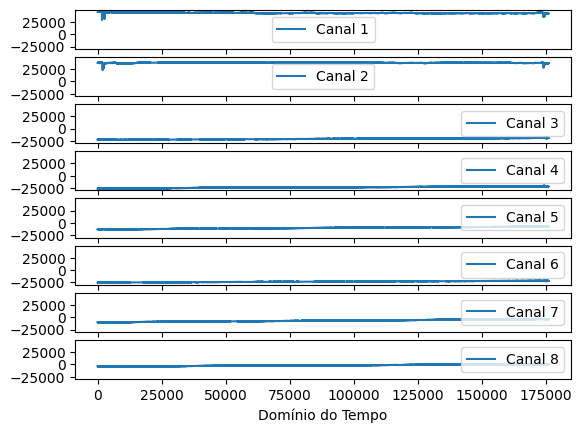

In [4]:
# n_linhas, n_cols, 
# sharex-todos os plots terão o mesmo limite horizontal 
# sharey-todos os plots terão o mesmo limite vertical 
_, axs = plt.subplots(8, 1, sharex=True, sharey=True)

# iterar em todos os canais
for i in range(8):
    axs[i].plot(data[i, :], label='Canal {}'.format(i+1))
    axs[i].legend()

plt.xlabel('Domínio do Tempo')
plt.show()

**PLOT NO DOMÍNIO DO TEMPO SEM SUBPLOTS**

[[ 45997.52  46077.2   46157.87 ...  42445.92  42503.61  42473.36]
 [ 37487.45  37578.29  37690.05 ...  36844.3   36892.94  36854.52]
 [-22369.71 -22259.92 -22231.69 ... -19134.23 -19094.87 -19144.65]
 ...
 [-24777.78 -24711.8  -24741.1  ... -21854.02 -21886.02 -21926.19]
 [-10055.49  -9977.57  -9976.9  ...  -3700.73  -3697.2   -3730.86]
 [ -3746.69  -3650.2   -3649.79 ...    488.59    493.86    449.9 ]]


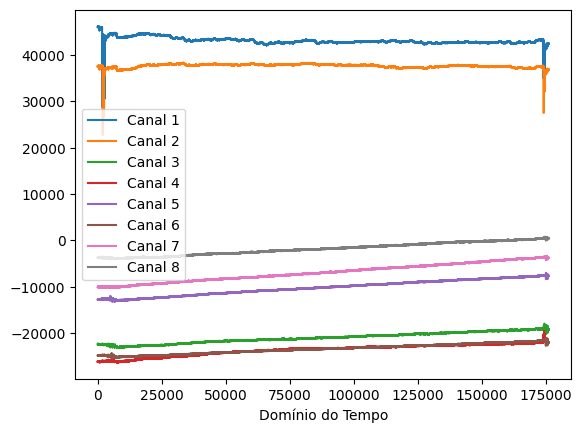

In [6]:
# iterar em todos os canais
for i in range(8):
    plt.plot(data[i, :], color=plt.cm.tab10(i), label='Canal {}'.format(i+1))

print(data)
    
plt.xlabel('Domínio do Tempo')
plt.legend()
plt.show()

**PLOT NO DOMÍNIO DA FREQUÊNCIA COM SUBPLOTS**

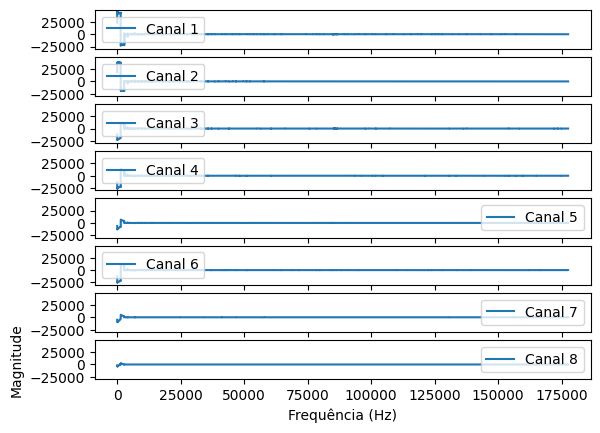

In [21]:
# n_linhas, n_cols, 
# sharex-todos os plots terão o mesmo limite horizontal 
# sharey-todos os plots terão o mesmo limite vertical 
_, axs = plt.subplots(8, 1, sharex=True, sharey=True)

for i in range(8):
    axs[i].plot(freqs[i], label='Canal {}'.format(i+1))
    axs[i].legend()

plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

**PLOT NO DOMÍNIO DA FREQUÊNCIA SEM SUBPLOTS**

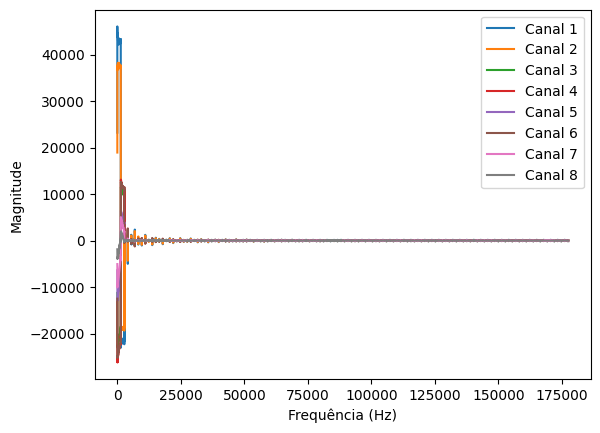

In [22]:
for i in range(8):
    plt.plot(freqs[i], label='Canal {}'.format(i+1))

plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

**Plot sobre a média no domínio do tempo**

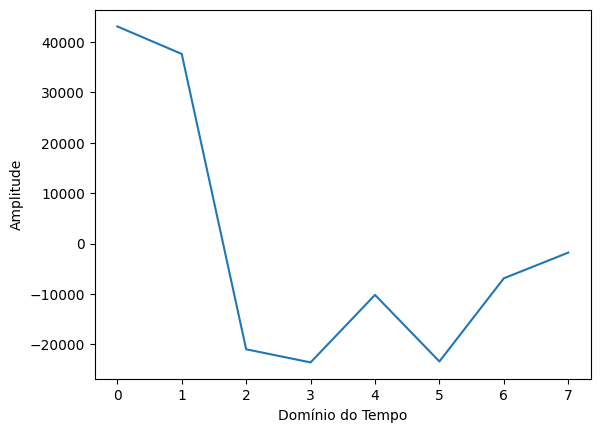

In [24]:
# Calcula as médias das linhas de data
media = np.mean(data, axis=1)

plt.plot(media)
plt.xlabel('Domínio do Tempo')
plt.ylabel('Amplitude')
plt.show()

**Plot sobre a média no domínio da frequência**

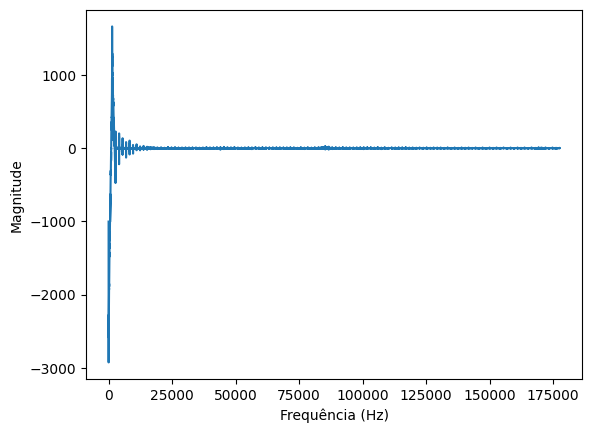

In [25]:
# Cálculo da média dos canais no domínio da frequência
media_eletrodos = np.mean(freqs, axis=0)

# Plot da média dos 8 eletrodos no domínio da frequência
plt.plot(media_eletrodos, label='Média dos 8 eletrodos no Domínio da Frequência')

plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.show()